In [1]:
import os
import sys
sys.path.append('utils')
from dataset.spot import SPOT, DailyDataset, get_loader, TOTAL_STD, TOTAL_MEAN
from tool import to_gpu
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import types

%matplotlib inline

In [2]:
from decompose_model import TDec_RNN as Model

In [3]:
dataset = DailyDataset(N=2000, W=21)
loader = get_loader(dataset, batch_size=64, shuffle=True, num_workers=2)

Data build range: [window(2010-06-20 00:00:00) - 2010-07-11 00:00:00, 2015-12-31 00:00:00]


In [4]:
trainX, trainY = dataset.get_io('2011-06-30', '2015-12-31')
testX, testY = dataset.get_io('2011-06-30', '2016-06-30')
testY_ = testY
with torch.no_grad():
#     test_period_input = to_gpu(testX)
#     self_test_input = to_gpu(testX[:trainX.size()[0] + 1])
    test_period_input = to_gpu(testY)

In [5]:
testY * TOTAL_STD + TOTAL_MEAN

tensor([[23.7840, 12.2620, 10.4930,  ..., 52.0900, 50.5050, 36.0580],
        [20.6330, 18.1900, 17.7020,  ..., 54.5350, 50.0000, 47.6480],
        [18.3870, 11.6880, 10.1950,  ..., 47.3010, 34.7230, 10.5380],
        ...,
        [24.0900, 23.1300, 22.7600,  ..., 28.3400, 24.0300, 22.1400],
        [20.6400, 14.7600, 12.0900,  ..., 29.9600, 25.1600, 23.3400],
        [22.0800, 20.1100, 19.8200,  ..., 27.7200, 29.3600, 24.6900]])

In [6]:
# PATH = './runs/decompose'
# run = 'T_gru_h_24_soft_1e-2_3e-6_1e-2'
# model = to_gpu(Model(input_dim=24, output_dim=24, hidden_size=24, cell='gru', hard_gate=0))
# snap = 'snapshots35'
# model.load_state_dict(torch.load(os.path.join(PATH, run, snap+'.pth')))

In [45]:
PATH = './runs/decompose'
run = 'test_aplha_30'
model = to_gpu(Model(input_dim=24, output_dim=24, hidden_size=24, cell='gru', hard_gate=0))
snap = 'snapshots22'
model.load_state_dict(torch.load(os.path.join(PATH, run, snap+'.pth')))

In [46]:
182*24*0.0005*TOTAL_STD

a=[x for x in range(0, 24*182)]
b=torch.zeros_like(test_period_input)
b[-183:-1,:]=torch.Tensor(a).reshape(182,24)*0.0005

c=[x for x in range(1, 24*182+1)]
d=torch.zeros_like(testY)
d[-183:-1,:]=torch.Tensor(c).reshape(182,24)*0.0005

add_trend=0
if add_trend:
    test_period_output= model.forecast(test_period_input+b)
    testY = testY_ + d
else:
    test_period_output= model.forecast(test_period_input)
    testY = testY_

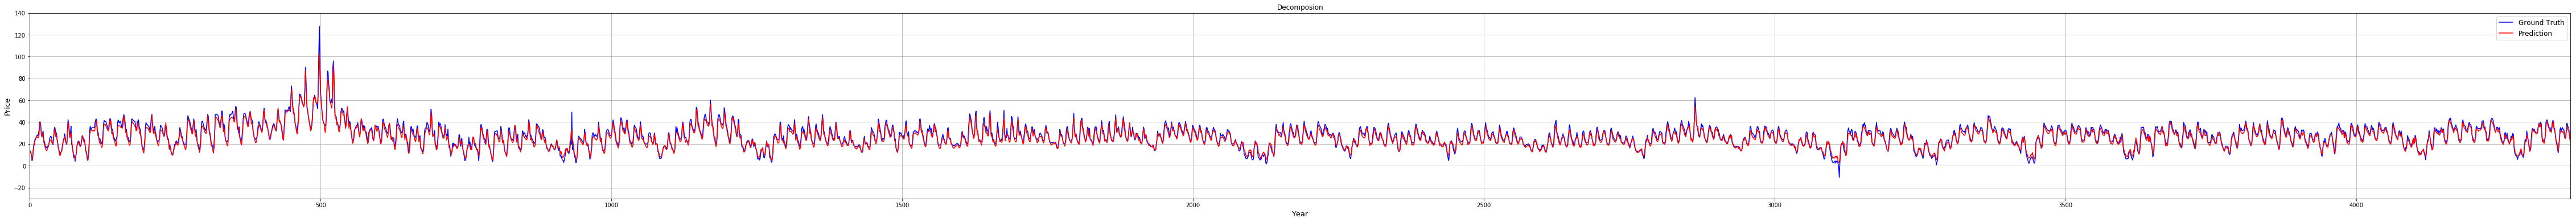

In [47]:
y_pred = torch.reshape(test_period_output[0].cpu(),(1848*24,)).detach().numpy() * TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy() * TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-183*24:-24], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-183*24:-24], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Decomposion')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.xlim(0,182*24)
plt.ylim(-30,140)
plt.grid()

plt.show()

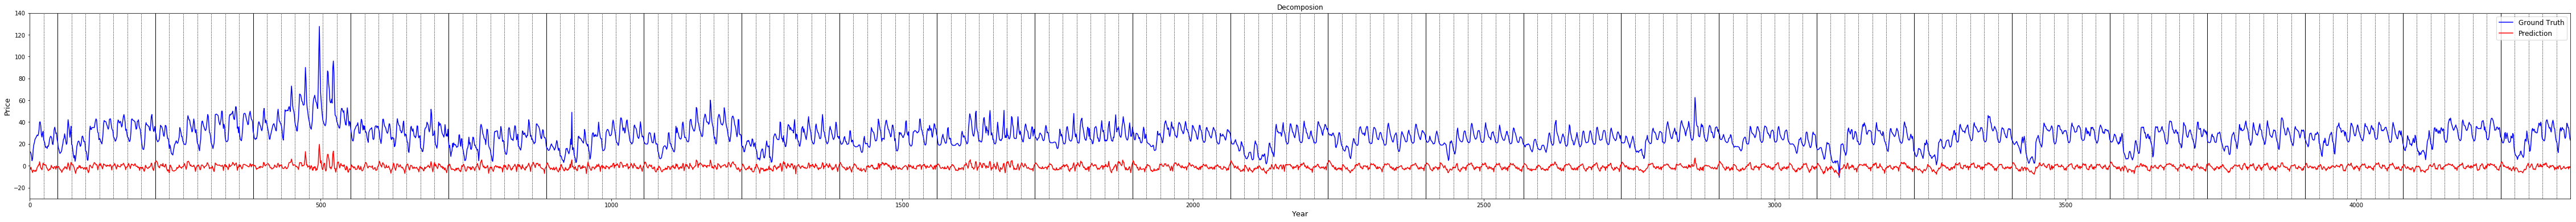

In [48]:
y_pred = torch.reshape(test_period_output[1].cpu(),(1848*24,)).detach().numpy()* TOTAL_STD# + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
x=np.linspace(1, 182*24, 182*24)
plt.plot(x, y[-183*24:-24], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-183*24:-24], color='red', label='Prediction')

plt.legend(fontsize='large') # 显示图例

plt.title('Decomposion')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.xlim(0,182*24)
plt.ylim(-30,140)

plt.vlines(np.array(range(1, 182, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
plt.vlines(np.array(range(2, 182, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)

plt.show()

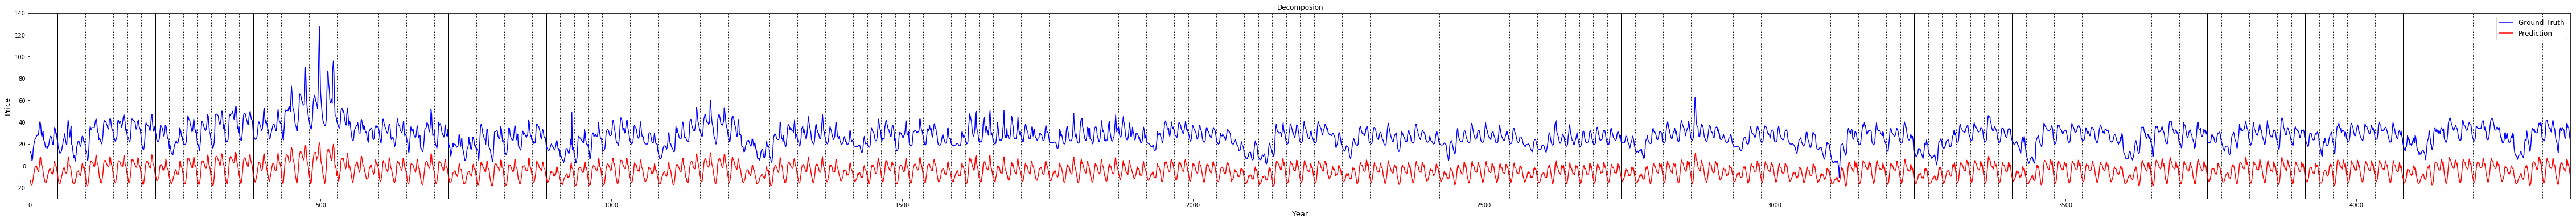

In [49]:
y_pred = torch.reshape(test_period_output[2].cpu(),(1848*24,)).detach().numpy()* TOTAL_STD# + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
x=np.linspace(1, 182*24, 182*24)
plt.plot(x, y[-183*24:-24], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-183*24:-24], color='red', label='Prediction')

plt.legend(fontsize='large') # 显示图例

plt.title('Decomposion')
plt.xlabel('Year',fontsize=13)

plt.ylabel('Price',fontsize=13)
plt.xlim(0,182*24)
plt.ylim(-30,140)

plt.vlines(np.array(range(1, 182, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
plt.vlines(np.array(range(2, 182, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)

plt.show()

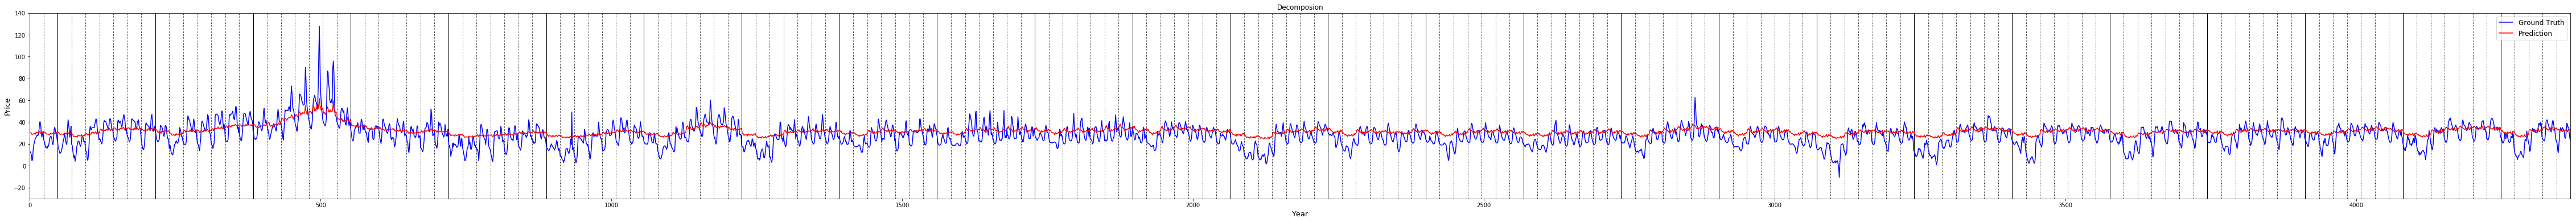

In [51]:
y_pred = torch.reshape(test_period_output[3].cpu(),(1848*24,)).detach().numpy()* TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
x=np.linspace(1, 182*24, 182*24)
plt.plot(x, y[-183*24:-24], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-183*24:-24], color='red', label='Prediction')

plt.legend(fontsize='large') # 显示图例

plt.title('Decomposion')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.xlim(0,182*24)
plt.ylim(-30,140)

plt.vlines(np.array(range(1, 182, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
plt.vlines(np.array(range(2, 182, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)

plt.show()

In [52]:
# save seasonal series to csv file

In [53]:
# df = pd.DataFrame(test_period_output[2].cpu().detach().numpy())
# indexs = pd.date_range('20110610', periods=1848)
# df.insert(0, 'datetime', indexs)
# df.to_csv('./dataset/' +"seasonal.csv", index=False)

In [54]:
# plot figures

In [55]:
pred = torch.reshape(test_period_output[0].cpu(),(1848*24,)).detach().numpy()[-182*24:]* TOTAL_STD + TOTAL_MEAN
res = torch.reshape(test_period_output[1].cpu(),(1848*24,)).detach().numpy()[-182*24:]* TOTAL_STD
rst = torch.reshape(test_period_output[2].cpu(),(1848*24,)).detach().numpy()[-182*24:]* TOTAL_STD
trend = torch.reshape(test_period_output[3].cpu(),(1848*24,)).detach().numpy()[-182*24:]* TOTAL_STD + TOTAL_MEAN
res1 = SPOT['2016':'2016-06'].values - rst - trend

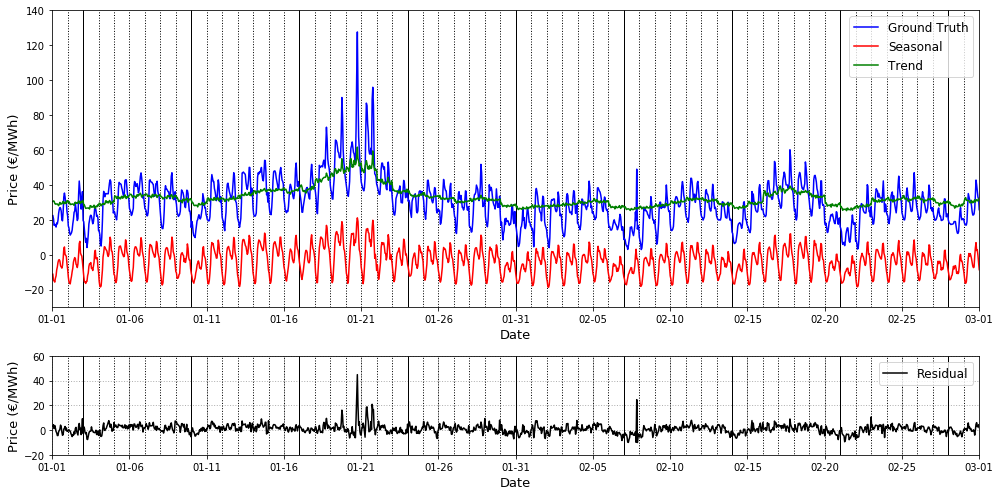

In [56]:
x=np.linspace(1, 60*24, 60*24)
fig = plt.figure(figsize=(14,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, SPOT['2016':'2016-02'].values, color='blue', label='Ground Truth')
ax1.plot(x, rst[:60*24], color='red', label='Seasonal')
ax1.plot(x, trend[:60*24], color='green', label='Trend')

ax1.legend(fontsize='large') # 显示图例

ax1.set_xlabel('Date',fontsize=13)
ax1.set_ylabel('Price (€/MWh)',fontsize=13)
ax1.set_xlim(0,60*24)
ax1.set_ylim(-30,140)
ax1.vlines(np.array(range(1, 60, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
ax1.vlines(np.array(range(2, 60, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)
ax1.set_xticks(np.array(range(0, 61, 5))*24) 
ax1.set_xticklabels(['01-01','01-06','01-11','01-16','01-21','01-26','01-31','02-05','02-10','02-15','02-20','02-25','03-01'])


ax2 = plt.subplot(gs[1]) 
ax2.plot(x, res1[:60*24], color='black', label='Residual')
ax2.legend(fontsize='large') # 显示图例
ax2.set_xlim(0,60*24)
ax2.set_ylim(-20,60)
ax2.vlines(np.array(range(1, 60, 1))*24, ymax=60, ymin=-30, linestyle=':', linewidth=1)
ax2.vlines(np.array(range(2, 60, 7))*24, ymax=60, ymin=-30, linestyle='-', linewidth=1)
ax2.set_xticks(np.array(range(0, 61, 5))*24)
ax2.set_xticklabels(['01-01','01-06','01-11','01-16','01-21','01-26','01-31','02-05','02-10','02-15','02-20','02-25','03-01'])
ax2.set_xlabel('Date',fontsize=13)
ax2.set_ylabel('Price (€/MWh)',fontsize=13)
ax2.grid(linestyle=':', linewidth=1)
plt.tight_layout() 

# plt.savefig('./figures/rnn_price_1&2_.jpg',bbox_inches='tight')
plt.show()

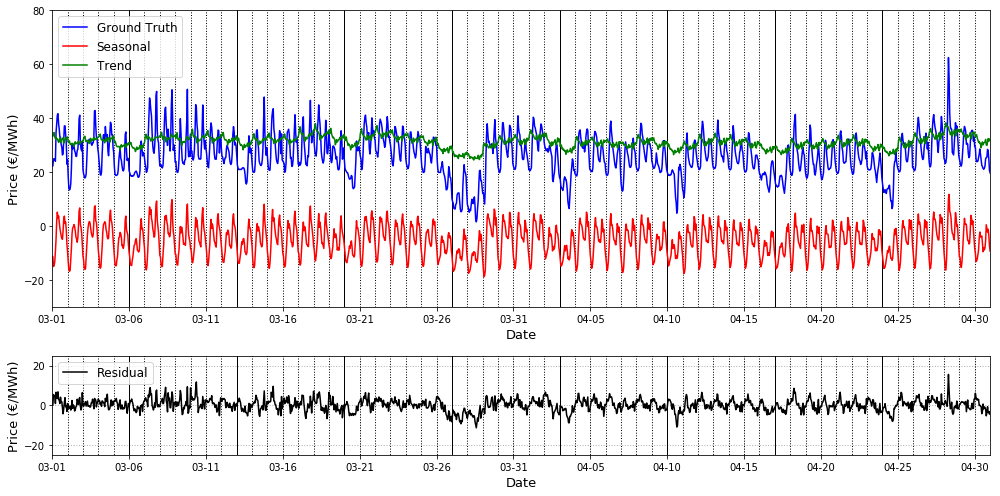

In [57]:
x=np.linspace(1, 61*24, 61*24)
fig = plt.figure(figsize=(14,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, SPOT['2016-03':'2016-04'].values, color='blue', label='Ground Truth')
ax1.plot(x, rst[60*24:121*24], color='red', label='Seasonal')
ax1.plot(x, trend[60*24:121*24], color='green', label='Trend')

ax1.legend(fontsize='large') # 显示图例

ax1.set_xlabel('Date',fontsize=13)
ax1.set_ylabel('Price (€/MWh)',fontsize=13)
ax1.set_xlim(0,61*24)
ax1.set_ylim(-30,80)
ax1.vlines(np.array(range(1, 61, 1))*24, ymax=80, ymin=-30, linestyle=':', linewidth=1)
ax1.vlines(np.array(range(5, 61, 7))*24, ymax=80, ymin=-30, linestyle='-', linewidth=1)
ax1.set_xticks(np.array(range(0, 62, 5))*24) 
ax1.set_xticklabels(['03-01','03-06','03-11','03-16','03-21','03-26','03-31','04-05','04-10','04-15','04-20','04-25','04-30'])


ax2 = plt.subplot(gs[1]) 
ax2.plot(x, res1[60*24:121*24], color='black', label='Residual')
ax2.legend(fontsize='large') # 显示图例
ax2.set_xlim(0,61*24)
ax2.set_ylim(-25,25)
ax2.vlines(np.array(range(1, 61, 1))*24, ymax=30, ymin=-30, linestyle=':', linewidth=1)
ax2.vlines(np.array(range(5, 61, 7))*24, ymax=30, ymin=-30, linestyle='-', linewidth=1)
ax2.set_xticks(np.array(range(0, 62, 5))*24)
ax2.set_xticklabels(['03-01','03-06','03-11','03-16','03-21','03-26','03-31','04-05','04-10','04-15','04-20','04-25','04-30'])
ax2.set_xlabel('Date',fontsize=13)
ax2.set_ylabel('Price (€/MWh)',fontsize=13)
ax2.grid(linestyle=':', linewidth=1)
plt.tight_layout() 

# plt.savefig('./figures/rnn_price_3&4.jpg',bbox_inches='tight')
plt.show()

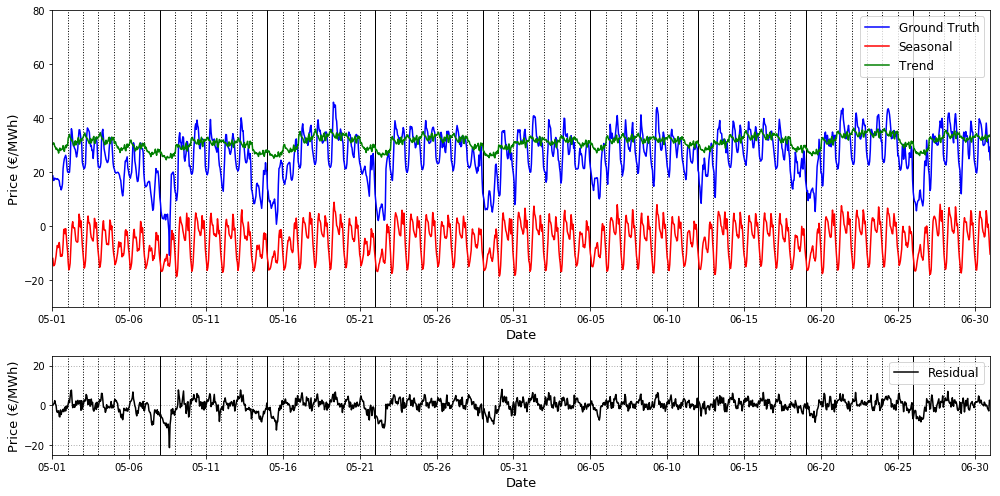

In [58]:
x=np.linspace(1, 61*24, 61*24)
fig = plt.figure(figsize=(14,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, SPOT['2016-05':'2016-06'].values, color='blue', label='Ground Truth')
ax1.plot(x, rst[121*24:182*24], color='red', label='Seasonal')
ax1.plot(x, trend[121*24:182*24], color='green', label='Trend')

ax1.legend(fontsize='large') # 显示图例

ax1.set_xlabel('Date',fontsize=13)
ax1.set_ylabel('Price (€/MWh)',fontsize=13)
ax1.set_xlim(0,61*24)
ax1.set_ylim(-30,80)
ax1.vlines(np.array(range(1, 61, 1))*24, ymax=80, ymin=-30, linestyle=':', linewidth=1)
ax1.vlines(np.array(range(7, 61, 7))*24, ymax=80, ymin=-30, linestyle='-', linewidth=1)
ax1.set_xticks(np.array(range(0, 62, 5))*24) 
ax1.set_xticklabels(['05-01','05-06','05-11','05-16','05-21','05-26','05-31','06-05','06-10','06-15','06-20','06-25','06-30'])


ax2 = plt.subplot(gs[1]) 
ax2.plot(x, res1[121*24:182*24], color='black', label='Residual')
ax2.legend(fontsize='large') # 显示图例
ax2.set_xlim(0,61*24)
ax2.set_ylim(-25,25)
ax2.vlines(np.array(range(1, 61, 1))*24, ymax=30, ymin=-30, linestyle=':', linewidth=1)
ax2.vlines(np.array(range(7, 61, 7))*24, ymax=30, ymin=-30, linestyle='-', linewidth=1)
ax2.set_xticks(np.array(range(0, 62, 5))*24)
ax2.set_xticklabels(['05-01','05-06','05-11','05-16','05-21','05-26','05-31','06-05','06-10','06-15','06-20','06-25','06-30'])
ax2.set_xlabel('Date',fontsize=13)
ax2.set_ylabel('Price (€/MWh)',fontsize=13)
ax2.grid(linestyle=':', linewidth=1)
plt.tight_layout() 

# plt.savefig('./figures/rnn_price_5&6.jpg',bbox_inches='tight')
plt.show()

# 误差分析

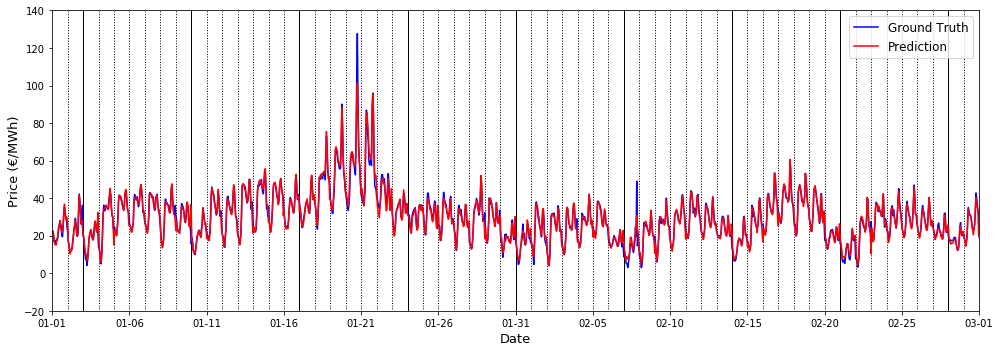

In [69]:
x=np.linspace(1, 60*24, 60*24)
plt.figure(figsize=(14,5)) 
plt.plot(x, SPOT['2016':'2016-02'].values, color='blue', label='Ground Truth')
plt.plot(x, pred[:60*24], color='red', label='Prediction')

plt.legend(fontsize='large') # 显示图例

plt.xlabel('Date',fontsize=13)
plt.ylabel('Price (€/MWh)',fontsize=13)
plt.xlim(0,60*24)
plt.ylim(-20,140)
plt.vlines(np.array(range(1, 60, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
plt.vlines(np.array(range(2, 60, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)
plt.xticks(np.array(range(0, 61, 5))*24, ['01-01','01-06','01-11','01-16','01-21','01-26','01-31','02-05','02-10','02-15','02-20','02-25','03-01']) 

plt.tight_layout() 

# plt.savefig('./figures/rnn_price_1&2_.jpg',bbox_inches='tight', dpi=140)
plt.show()

# 模型可视化

In [65]:
w1=model.h2o1.weight
w2=model.h2o2.weight
w3=model.h2o3.weight

In [66]:
w1+w2+w3

tensor([[ 0.0570,  0.0685,  0.1294, -0.2156, -0.3657,  0.4366,  0.2311,  0.0026,
          0.2202,  0.0609, -0.4621, -0.6238, -0.0589,  0.1401,  0.0032,  0.5976,
          0.0854, -0.0828,  0.3310, -0.1040,  0.3900,  0.3299, -0.2658, -0.2246],
        [-0.2738,  0.0606,  0.2007, -0.3894, -0.3197,  0.2023, -0.2680, -0.0466,
          0.3530,  0.2089, -0.1138, -0.4160, -0.3614, -0.0380,  0.0225,  0.0040,
          0.3506, -0.2354, -0.0330, -0.1185,  0.4672,  0.4662, -0.1265,  0.0100],
        [-0.0503,  0.1400, -0.6209, -0.1049, -0.1365,  0.5444, -0.5006, -0.3436,
          0.2999,  0.0263,  0.1693,  0.1131, -0.2009,  0.0488,  0.2083, -0.2313,
          0.0360, -0.0126,  0.4197, -0.1387,  0.4932,  0.2286,  0.1401, -0.1309],
        [ 0.0371,  0.2547, -0.2851, -0.0503,  0.1134,  0.0611, -0.3969, -0.2185,
          0.4149,  0.3987,  0.0179,  0.0946, -0.4863, -0.3775,  0.1302, -0.2849,
          0.0183,  0.2909,  0.4671,  0.0545,  0.5555,  0.6440, -0.2660,  0.1550],
        [ 0.3624,  0.071